# Practice problem_Multiclass Classificiation with Reuters dataset

This dataset is set of short articles and topics. There are 46 topics, which has at leat 10 samples. 

## 1. Data
### 1.1 Data load


In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 3s 1us/step


In [3]:
print("Number of train set: ", len(train_data))
print("Number of test set: ", len(test_data))

Number of train set:  8982
Number of test set:  2246


In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

##### How to decode to text

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Y indicates the topic by its index, 0 to 45.

In [12]:
train_labels[2]

3

In [13]:
len(train_data)

8982

### 1.2 Data preparation

##### For X
We need to convert data to vector.

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

##### For Y

one_hot encoding

In [49]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 2. Algorithm
### 2.1 Model define

This dataset looks similar to IMDB dataset that we used lastly. But there are 46 class in Reuters, which has way more class than IMDB. So, we need to consider bottleneck. To figure out this, I am going to use 64 units with softmax to classify multiclass label at last layer, rather than 16 units.

In [38]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

### 2.2 Model compile (optimizer, loss, metric)

In [39]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 3. Training

###  3.1 Data split

In [40]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### 3.2 fit

In [41]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 410us/step - loss: 2.4611 - acc: 0.4995 - val_loss: 1.6600 - val_acc: 0.6540
Epoch 2/20
7982/7982 [==============================] - 2s 257us/step - loss: 1.3631 - acc: 0.7155 - val_loss: 1.2695 - val_acc: 0.7350
Epoch 3/20
7982/7982 [==============================] - 2s 227us/step - loss: 1.0131 - acc: 0.7855 - val_loss: 1.1081 - val_acc: 0.7700
Epoch 4/20
7982/7982 [==============================] - 2s 228us/step - loss: 0.7853 - acc: 0.8368 - val_loss: 1.0120 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.6173 - acc: 0.8720 - val_loss: 0.9609 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.4847 - acc: 0.9014 - val_loss: 0.9155 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.3911 - acc: 0.9168 - val_loss: 0.9365 - val_acc: 0.8020


### 3.3 History
##### Loss

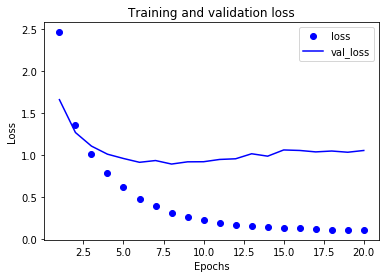

In [43]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Accuracy

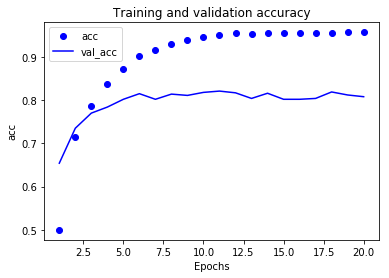

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'b', label='val_acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

From 10th epochs, overfitting begins. So, We are going to predict testset with trained model for 10 epochs.

## 4. Predict

In [50]:
model = models.Sequential()
model.add(layers.Dense(70, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
          

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 287us/step - loss: 2.6755 - acc: 0.5019 - val_loss: 1.7628 - val_acc: 0.6430
Epoch 2/10
7982/7982 [==============================] - 2s 227us/step - loss: 1.4294 - acc: 0.7090 - val_loss: 1.2877 - val_acc: 0.7150
Epoch 3/10
7982/7982 [==============================] - 2s 223us/step - loss: 1.0341 - acc: 0.7821 - val_loss: 1.1220 - val_acc: 0.7490
Epoch 4/10
7982/7982 [==============================] - 2s 236us/step - loss: 0.8034 - acc: 0.8282 - val_loss: 1.0236 - val_acc: 0.7890
Epoch 5/10
7982/7982 [==============================] - 2s 249us/step - loss: 0.6323 - acc: 0.8682 - val_loss: 0.9455 - val_acc: 0.8140
Epoch 6/10
7982/7982 [==============================] - 2s 241us/step - loss: 0.4983 - acc: 0.8975 - val_loss: 0.9322 - val_acc: 0.7960
Epoch 7/10
7982/7982 [==============================] - 2s 216us/step - loss: 0.3998 - acc: 0.9177 - val_loss: 0.8876 - val_acc: 0.8190


In [51]:
results

[1.02821849375459, 0.7876224398931434]